In [1]:
import sys

sys.path.append("../")

from bunkatopics import Bunka
from bunkatopics.functions.clean_text import clean_tweet
from langchain.embeddings import HuggingFaceEmbeddings
import random
from datasets import load_dataset
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
dataset = load_dataset("rguo123/trump_tweets")["train"]
full_docs = dataset["content"]
full_docs = random.sample(full_docs, 500)
full_docs = [clean_tweet(x) for x in full_docs]
full_docs = [x for x in full_docs if len(x)>50]

In [3]:
len(full_docs)

418

In [4]:
#embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")

bunka = Bunka(embedding_model=embedding_model)
bunka.fit(full_docs)
bunka.get_topics(n_clusters=10)

docs = bunka.docs
topics = bunka.topics

Chose a Generative AI Model

INFO      |2023-10-08 16:38:33|{}|fit|Extracting Terms
100%|██████████████████████████████████████| 2444/2444 [00:14<00:00, 166.44it/s]
INFO      |2023-10-08 16:38:48|{}|fit|Embedding Documents, this may take few minutes
INFO      |2023-10-08 16:39:14|{}|fit|Reducing Dimensions
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



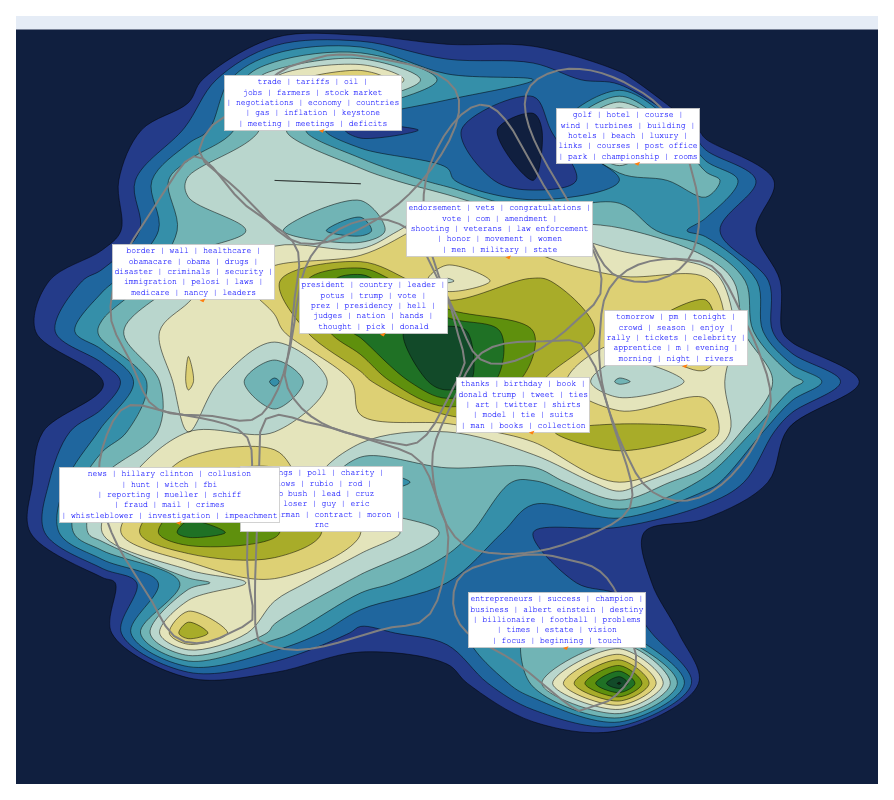

In [21]:

# Topic Modeling
df_topics = bunka.get_topics(n_clusters=10)
topic_fig = bunka.visualize_topics(width=800, height=800)
topic_fig.show()

Chose a Generative AI Model

In [22]:
from langchain.llms import OpenAI
open_ai_generative_model = OpenAI(openai_api_key = os.getenv('OPEN_AI_KEY'))

from langchain.llms import LlamaCpp
generative_model = LlamaCpp(
    model_path=os.getenv("MODEL_PATH"),
    n_ctx=2048,
    temperature=0.75,
    max_tokens=2000,
    top_p=1,
    verbose=False,
)
generative_model.client.verbose = False

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /Users/charlesdedampierre/Desktop/llama.cpp/models/Mistral/ggml-model-q4_0.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_0     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q4_0     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q4_0     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q4_0     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q4_0     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_gate.weight q4_0     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.ffn_up.weight q4_0     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    7:            blk.0.ffn

In [23]:
# Topic Modeling Clean
df_topics = bunka.get_clean_topic_name(generative_model=open_ai_generative_model)
topic_fig_clean = bunka.visualize_topics(width=800, height=800)
#topic_fig_clean.show()

Creating new labels for clusters: 100%|█████████| 10/10 [00:04<00:00,  2.35it/s]


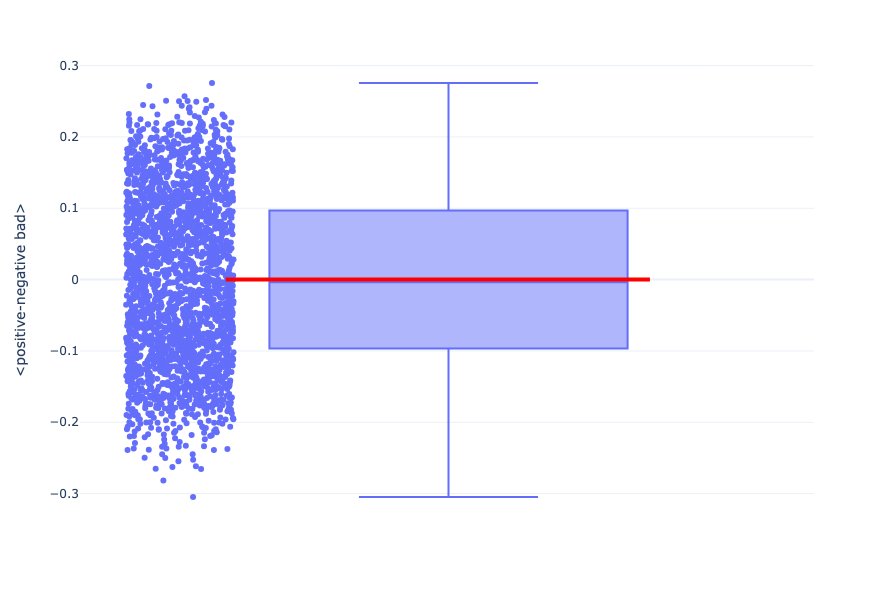

In [24]:
fig_solo = bunka.visualize_bourdieu_one_dimension(
    left=["negative", "bad"],
    right=["positive"],
    width=600,
    height=600,
    explainer=False,
)

fig_solo.show()

In [ ]:
manual_axis_name = {
                    'x_left_name':'hate',
                    'x_right_name':'peace',
                   'y_top_name':'past',
                    'y_bottom_name':'future',
                    }

bourdieu_fig = bunka.visualize_bourdieu(
    generative_model=open_ai_generative_model,
    x_left_words=["this is about about hate"],
    x_right_words=["this is a about peace"],
    y_top_words=["this is about past"],
    y_bottom_words=["this is about future"],
    height=1000,
    width=1000,
    display_percent=False,
    clustering=True,
    topic_n_clusters=5,
    topic_terms=5,
    topic_top_terms_overall=500,
    topic_gen_name=True,
    convex_hull = True,
    radius_size = 0.5,
    manual_axis_name = manual_axis_name
)

bourdieu_fig.show()

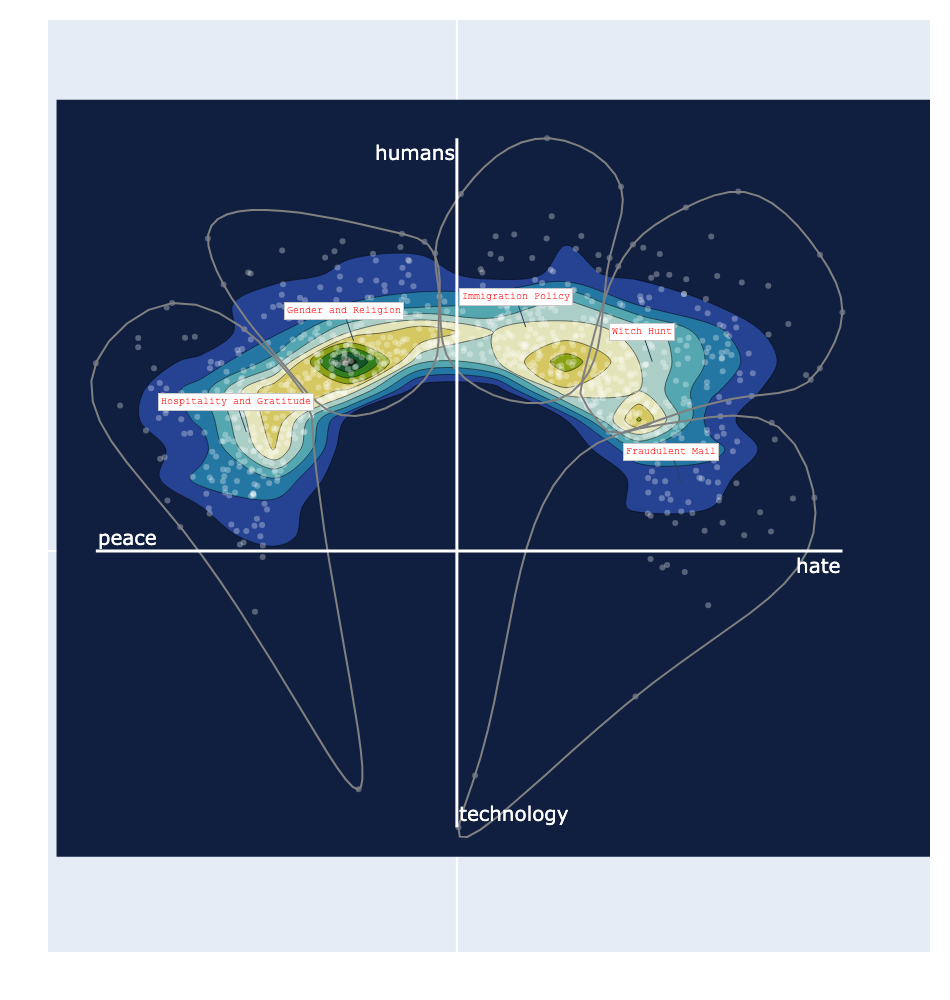

In [26]:
bourdieu_fig.show()

In [27]:
import plotly

#plotly.offline.plot(bourdieu_fig)

In [28]:
res = bunka.rag_query(query = 'Who is Donald Trump', generative_model = generative_model, top_doc = 5)

INFO      |2023-10-08 16:39:38|{}|rag_query|Answering your query, please wait a few seconds


In [29]:
print(res['result'])

 Donald Trump


In [30]:
for doc in res['source_documents']:
    text = doc.page_content.strip()
    print(text)

donaldtrump is an emblem of hope that the best is yet to come for america  the good trump name will be proudly displayed
the most over rated person on the planet  donald j  trump  except by himself  why do you follow loser
dont think your more than donald trump   he is the best   thanks
mr donald trump is one of the most intelligent business men alive  thank you
donald trump is the greatest hope for this country we have
